стэк для решения не был указан, поэтому решил, что скриптом будет удобнее, 
т.к. его можно будет использовать для решения в дальнейшем аналогичных задач (для других акций) 

# Подготовка данных

In [451]:
import xlrd
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('TkAgg')
import scipy.stats as stats
from matplotlib import pyplot

%pylab inline

xl = pd.ExcelFile('Тест ДИ2-1.xlsx') #открываем

print(xl.sheet_names) #смотрим список листов

data = xl.parse('данные') # получаем data frame

data = data.loc[2:450]
columns_1 = ['actionGroup', 
              'magazin',
              'days',
              'Revenue',
              'Checks',
              'Qty',
              'Avg_Check_Size',
              'Avg_Check',
              'before_days',
              'before_Revenue',
              'before_Checks',
              'before_Qty',
              'before_Avg_Check_Size',
              'before_Avg_Check'
               ]
data.columns = columns_1 
data = data.drop('actionGroup', axis=1) 
columns_1.remove('actionGroup')           # переводим из object в int64 и float64
for i in columns_1:
    data[i] = pd.to_numeric(data[i])
data['Revenue'] = data['Revenue'].astype('int')
data['Avg_Check'] = data['Avg_Check'].astype('int')
data



Populating the interactive namespace from numpy and matplotlib
['данные', 'задание']


,magazin,days,Revenue,Checks,Qty,Avg_Check_Size,Avg_Check,before_days,before_Revenue,before_Checks,before_Qty,before_Avg_Check_Size,before_Avg_Check
2,1,16,36987,132,220,1.666667,280,16.0,24969.4400,92.0,150.0,1.6304,271.406957
3,2,16,70944,358,636,1.776536,198,16.0,82326.7109,299.0,473.0,1.5819,275.340170
4,3,16,93335,440,791,1.797727,212,16.0,68219.6800,291.0,411.0,1.4124,234.431890
5,4,16,28390,130,168,1.292308,218,16.0,22224.9300,124.0,139.0,1.1210,179.233306
6,5,16,35707,122,165,1.352459,292,16.0,17469.5100,85.0,106.0,1.2471,205.523647
...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,441,16,24352,132,197,1.492424,184,16.0,14462.4000,83.0,99.0,1.1928,174.245783
443,442,15,24500,91,141,1.549451,269,16.0,18177.1700,50.0,59.0,1.1800,363.543400
444,443,9,7653,15,24,1.600000,510,7.0,1669.6900,10.0,11.0,1.1000,166.969000
445,444,16,29977,126,154,1.222222,237,15.0,18961.5800,62.0,71.0,1.1452,305.831935


In [452]:
data.isnull().sum()  # пропущенные значения
# видим, что нет данных для 9 магазинов до акции

magazin                  0
days                     0
Revenue                  0
Checks                   0
Qty                      0
Avg_Check_Size           0
Avg_Check                0
before_days              9
before_Revenue           9
before_Checks            9
before_Qty               9
before_Avg_Check_Size    9
before_Avg_Check         9
dtype: int64

# оценить значимость изменений 

In [453]:
data.describe()
#count - число непустых ячеек
#mean - среднее значение значений столбца
#std - стандартное отклонение 
#min и max - минимальное и максимальное значение в столбце
#25%, 50%, 75% - квантили

# средния значения увеличилось по всем показателям

,magazin,days,Revenue,Checks,Qty,Avg_Check_Size,Avg_Check,before_days,before_Revenue,before_Checks,before_Qty,before_Avg_Check_Size,before_Avg_Check
count,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,223.000000,14.456180,31876.137079,169.966292,244.233708,1.474106,288.334831,14.126147,27597.366621,125.346330,168.383028,1.324836,284.798677
std,128.604691,3.058144,28525.213502,243.229559,330.910938,0.388204,206.232655,3.155751,26190.992208,165.815232,221.836768,0.224054,148.277408
min,1.000000,1.000000,-2211.000000,1.000000,2.000000,0.333333,-184.000000,1.000000,85.000000,1.000000,3.000000,1.000000,17.000000
25%,112.000000,15.000000,12015.000000,46.000000,64.000000,1.308943,169.000000,14.000000,10096.850000,36.000000,47.750000,1.185650,174.433779
50%,223.000000,16.000000,23461.000000,94.000000,134.000000,1.407407,237.000000,16.000000,20455.255000,74.000000,100.000000,1.287850,258.385510
75%,334.000000,16.000000,43163.000000,200.000000,284.000000,1.560000,337.000000,16.000000,37116.477250,143.250000,200.750000,1.401700,377.998240
max,445.000000,16.000000,212835.000000,2130.000000,2798.000000,7.000000,1832.000000,16.000000,191717.870000,1265.000000,1663.000000,3.000000,826.112500


смотрим на изменение показателей в процентах(%) 

в примере я учитываю, что у нас данные за разный период
но это не относиться к размер для Avg_Check_Size,Avg_Check,before_Avg_Check_Size,before_Avg_Check, т.к там отношения

значения где пропущены данные не учитываюся 


In [474]:


data['изменение_выручки%'] = (data['before_days']*data['Revenue'])/(data['days']*data['before_Revenue']) * 100
data['изменение_кол_чеков%'] = (data['before_days']*data['Checks'])/(data['days']*data['before_Checks']) * 100
data['изменение_объема%'] = (data['before_days']*data['Qty'])/(data['days']*data['before_Qty']) * 100
data['изменение_размера_чека%'] = (data['before_days']*data['Avg_Check_Size'])/(data['days']*data['before_Avg_Check_Size']) * 100
data['изменение_среднего_чека%'] = (data['before_days']*data['Avg_Check'])/(data['days']*data['before_Avg_Check']) * 100
sp1 = ['изменение_выручки%','изменение_объема%','изменение_среднего_чека%','изменение_кол_чеков%','изменение_размера_чека%']
grow = data[sp1]
grow


,изменение_выручки%,изменение_объема%,изменение_среднего_чека%,изменение_кол_чеков%,изменение_размера_чека%
2,148.129073,146.666667,103.166110,143.478261,102.224403
3,86.173733,134.460888,71.911047,119.732441,112.303958
4,136.815359,192.457421,90.431383,151.202749,127.281738
5,127.739435,120.863309,121.629179,104.838710,115.281685
6,204.396116,155.660377,142.076109,143.529412,108.448321
...,...,...,...,...,...
442,168.381458,198.989899,105.597964,159.036145,125.119403
443,143.770088,254.915254,78.926844,194.133333,140.063327
444,356.493321,169.696970,237.569050,116.666667,113.131313
445,148.212530,203.345070,72.650196,190.524194,100.055303


смотрим на сколько увеличилось в средем по всем магазинам выручка


In [475]:
grow.mean() # в среднем изменения положительне

изменение_выручки%          141.340036
изменение_объема%           144.988080
изменение_среднего_чека%    114.533444
изменение_кол_чеков%        131.277331
изменение_размера_чека%     109.070433
dtype: float64

посмотрим кол-во магазинов, где акция дала положительный результат

количество магазинов где было положительное изменение_выручки = 302
количество магазинов где было положительное изменение_объема = 392
количество магазинов где было положительное изменение_среднего_чека = 158
количество магазинов где было положительное изменение_кол_чеков = 375
количество магазинов где было положительное изменение_размера_чека = 272
количество магазинов где было отрицательное изменение_выручки = 134
количество магазинов где было отрицательное изменение_объема = 43
количество магазинов где было отрицательное изменение_среднего_чека = 278
количество магазинов где было отрицательное изменение_кол_чеков = 57
количество магазинов где было отрицательное изменение_размера_чека = 164


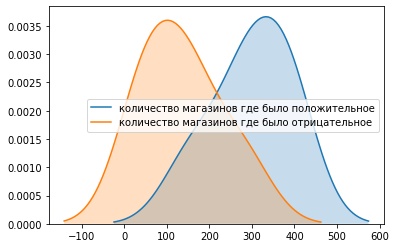

In [6]:
p = [] # счетчик для магазинов с положительным изменением
m = [] # счетчик для магазинов с отрицательным изменением
for i in sp1:    #
    a = (i+' > 100' )
    a = len(data.query(a))
    p.append(a)
    print('количество магазинов где было положительное '+i + ' =', a)
for i in sp1:
    b = (i+' < 100' )
    b = len(data.query(b))
    m.append(b)
    print('количество магазинов где было отрицательное '+i + ' =', b)  
df = pd.DataFrame({           #пустой дата frame
    'количество магазинов где было положительное':p,
    'количество магазинов где было отрицательное':m,
                    })
# построим гистаграмму распределения и сравним
snsplot = sns.kdeplot(df['количество магазинов где было положительное'], shade=True)
snsplot = sns.kdeplot(df['количество магазинов где было отрицательное'], shade=True)
fig = snsplot.get_figure()


# Оценка доверительных интервалов 

Оценим распределение для Revenue и before_Revenue
доверительные интервалы будем считать для среднего 
уровень доверия возьмем 0.95
учитываем, то наши значения за разный период времени

Чем шире доверительный интервал, тем более неточная оценка, и наоборот, узкий доверительный интервал дает оценку точнее

In [70]:
#учитываем, то наши значения за разный период времени
# к Avg_Check_Size,Avg_Check,before_Avg_Check_Size,before_Avg_Check не относиться
data['days'].describe()


count    445.000000
mean      14.456180
std        3.058144
min        1.000000
25%       15.000000
50%       16.000000
75%       16.000000
max       16.000000
Name: days, dtype: float64

In [457]:
#видим что в основном превалирует период '16дней', остальные данные, где отличается период возьмем в пропорции с с 16-ю
#т.е. где было 16 дней там останеться такое же значение, в остальных будет пропорцианально подгоняться
data['before_Revenue_ds'] = data['before_Revenue']/data['before_days'] * 16
data['before_Checks_ds'] = data['before_Checks']/data['before_days'] * 16
data['before_Qty_ds'] = data['before_Qty']/data['before_days'] * 16
data['Revenue_ds'] = data['Revenue']/data['days'] * 16
data['Checks_ds'] = data['Checks']/data['days'] * 16
data['Qty_ds'] = data['Qty']/data['days'] * 16


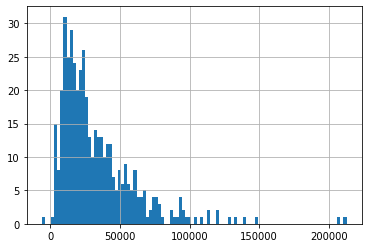

In [74]:
data['Revenue_ds'].hist(bins=100) 

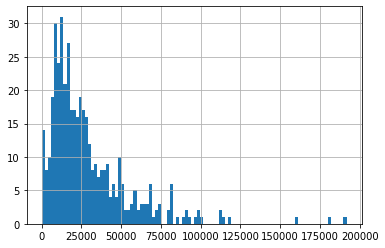

In [75]:
data['before_Revenue_ds'].hist(bins=100)


и тут есть три варианта:

1. считать доверительные интервалы как есть
2. вспомнить центральную предельная теорему, вспомним, что распределение средних есть нормальное распределение, а для нормального распределения мы знаем как строить доверительный интервал
3. изменить выборку, чтобы больше походило на нормальное распределение 

разумным считаю второй вариант, но сделаю первый и второй для сравнения


In [458]:
#первый случай

def dov_int(data,name,value):
    nm = str(data)
    z_value = stats.norm.ppf(q = 0.95) # Индекс стандартного отклонения
    st_dev = data.std() # Стандартное отклонение
    mean = data.mean() # Среднее
    size = len(data) # размер
    interval = z_value * (st_dev/np.sqrt(sample_size)) # считаем интервал
    conf_inv = (mean - interval, mean + interval) # дов. инт.
    data.describe()
    print('доверительный интервал для', name)
    conf_inv
    n = mean - interval
    v = mean + interval
    print(n,' - ',v)
    print('при среднем = ', mean)
    
    
    snsplot = sns.kdeplot(data, shade=True) # строим гистаграму и накладывем занчения дов.интервала
    y = [0,value]
    ax = sns.lineplot(n,y) 
    ax = sns.lineplot(v,y)

доверительный интервал для Revenue
31104.184418975976  -  35425.258161015816
при среднем =  33264.7212899959
доверительный интервал для before_Revenue
25555.1622443489  -  29639.570998311658
при среднем =  27597.36662133028


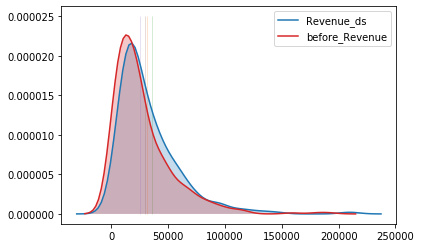

In [189]:
dov_int(data['Revenue_ds'],'Revenue',0.000025)
dov_int(data['before_Revenue'],'before_Revenue',0.000025)

доверительный интервал для before_Checks_ds
116.54165224590358  -  142.0978007577696
при среднем =  129.31972650183658
доверительный интервал для Checks_ds
154.2757122259366  -  191.95190584887254
при среднем =  173.11380903740456


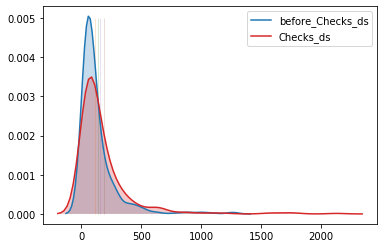

In [190]:

dov_int(data['before_Checks_ds'],'before_Checks_ds',0.005)
dov_int(data['Checks_ds'],'Checks_ds',0.005)

доверительный интервал для before_Qty
156.40230268988026  -  190.62618360466107
при среднем =  173.51424314727066
доверительный интервал для Qty
223.53104219613772  -  274.7227944541034
при среднем =  249.12691832512056


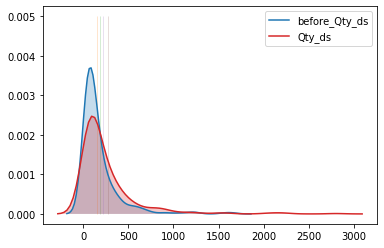

In [194]:
dov_int(data['before_Qty_ds'],'before_Qty',0.005)
dov_int(data['Qty_ds'],'Qty',0.005)

доверительный интервал для before_Avg_Check_Size
1.3073654930456535  -  1.342306066587374
при среднем =  1.3248357798165138
доверительный интервал для Avg_Check_Size
1.4438367260620215  -  1.5043759934892365
при среднем =  1.474106359775629


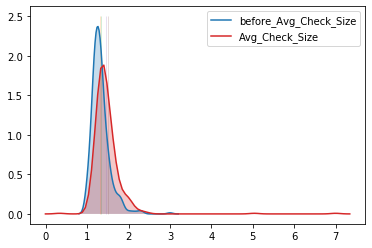

In [207]:

dov_int(data['before_Avg_Check_Size'],'before_Avg_Check_Size',2.5)
dov_int(data['Avg_Check_Size'],'Avg_Check_Size',2.5)


доверительный интервал для Avg_Check
272.25414131502674  -  304.41552160632153
при среднем =  288.33483146067414
доверительный интервал для before_Avg_Check
273.23696296415164  -  296.36039177078044
при среднем =  284.79867736746604


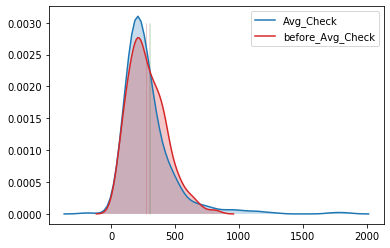

In [203]:
dov_int(data['Avg_Check'],'Avg_Check',0.003)
dov_int(data['before_Avg_Check'],'before_Avg_Check',0.003)

# второй случай



In [469]:
# избавляемся от пустых стобцов
if data['before_Revenue'].isnull().sum() == 0:
    data = data.query("before_Revenue not in ['NAN']")
else:
    None


,magazin,days,Revenue,Checks,Qty,Avg_Check_Size,Avg_Check,before_days,before_Revenue,before_Checks,...,изменение_кол_чеков$,изменение_объема$,изменение_размера_чека$,изменение_среднего_чека$,before_Revenue_ds,before_Checks_ds,before_Qty_ds,Revenue_ds,Checks_ds,Qty_ds
2,1,16,36987,132,220,1.666667,280,16.0,24969.4400,92.0,...,143.478261,146.666667,102.224403,103.166110,24969.440000,92.000000,150.000000,36987.000000,132.000000,220.000000
3,2,16,70944,358,636,1.776536,198,16.0,82326.7109,299.0,...,119.732441,134.460888,112.303958,71.911047,82326.710900,299.000000,473.000000,70944.000000,358.000000,636.000000
4,3,16,93335,440,791,1.797727,212,16.0,68219.6800,291.0,...,151.202749,192.457421,127.281738,90.431383,68219.680000,291.000000,411.000000,93335.000000,440.000000,791.000000
5,4,16,28390,130,168,1.292308,218,16.0,22224.9300,124.0,...,104.838710,120.863309,115.281685,121.629179,22224.930000,124.000000,139.000000,28390.000000,130.000000,168.000000
6,5,16,35707,122,165,1.352459,292,16.0,17469.5100,85.0,...,143.529412,155.660377,108.448321,142.076109,17469.510000,85.000000,106.000000,35707.000000,122.000000,165.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,441,16,24352,132,197,1.492424,184,16.0,14462.4000,83.0,...,159.036145,198.989899,125.119403,105.597964,14462.400000,83.000000,99.000000,24352.000000,132.000000,197.000000
443,442,15,24500,91,141,1.549451,269,16.0,18177.1700,50.0,...,194.133333,254.915254,140.063327,78.926844,18177.170000,50.000000,59.000000,26133.333333,97.066667,150.400000
444,443,9,7653,15,24,1.600000,510,7.0,1669.6900,10.0,...,116.666667,169.696970,113.131313,237.569050,3816.434286,22.857143,25.142857,13605.333333,26.666667,42.666667
445,444,16,29977,126,154,1.222222,237,15.0,18961.5800,62.0,...,190.524194,203.345070,100.055303,72.650196,20225.685333,66.133333,75.733333,29977.000000,126.000000,154.000000


In [470]:
# чем больше мы задаем размер выборки тем ближе распределение средних к нормальному распределению

def generate_distribution(data, dist_size):   # функция получает колонку и размер выборки
    
    name = data.name

    sample_size = len(data) #размер
    sample_means = [] # Сюда будем заполнять средние
    for i in range(dist_size):
        sample = np.random.choice(a = data, size = sample_size)  # генерируем распределения средних
        sample_means.append(np.mean(sample)) # заполняем список
    plt.hist(sample_means, bins=100); # смотрим на гистограмму распределение средних
    plt.xlabel(name);
    np.sort(sample_means) 
    lb = np.percentile(sample_means, 5)  #считаем доверительный интервал
    ub = np.percentile(sample_means, 95)
    print("доверительный интервал of",name, (lb, ub))    
    
    y = [0,60]
    ax = sns.lineplot(lb,y) # построим дов. интервал на график
    ax = sns.lineplot(ub,y)

Теперь для каждой пары высчитываем значения.
Синим будет показаны значения до акции, красным после, и лучи показывающие значения дов.интервала

доверительный интервал of before_Revenue_ds (26894.91179169012, 30826.983276665233)
доверительный интервал of Revenue_ds (31370.76932438866, 35665.96632168799)


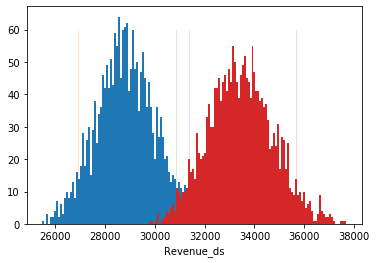

In [473]:
generate_distribution(data['before_Revenue_ds'],2000)
generate_distribution(data['Revenue_ds'],2000)
# pl

доверительный интервал of before_Checks_ds (116.71535146046614, 142.43153495332393)
доверительный интервал of Checks_ds (158.50795698694782, 196.2338879418237)


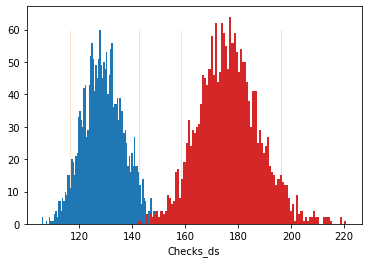

In [441]:
generate_distribution(data['before_Checks_ds'],2000)
generate_distribution(data['Checks_ds'],2000)


доверительный интервал of before_Qty_ds (157.09456637144712, 191.8305985757362)
доверительный интервал of Qty_ds (229.01791476617166, 279.93734604844695)


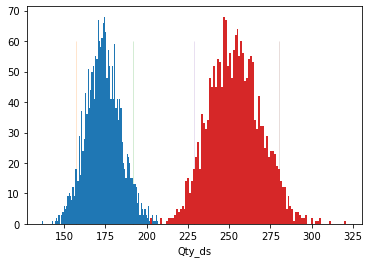

In [442]:
generate_distribution(data['before_Qty_ds'],2000)
generate_distribution(data['Qty_ds'],2000)


доверительный интервал of before_Avg_Check_Size (1.308160711009174, 1.34233875)
доверительный интервал of Avg_Check_Size (1.4300545605372197, 1.4734654619649927)


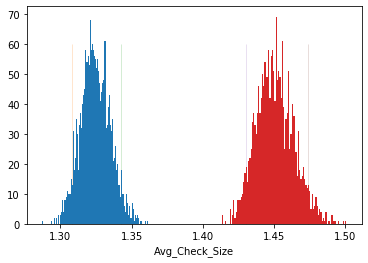

In [443]:
generate_distribution(data['before_Avg_Check_Size'],2000)
generate_distribution(data['Avg_Check_Size'],2000)

доверительный интервал of before_Avg_Check (272.8558339235902, 296.374646655825)
доверительный интервал of Avg_Check (258.4212155963303, 282.60928899082575)


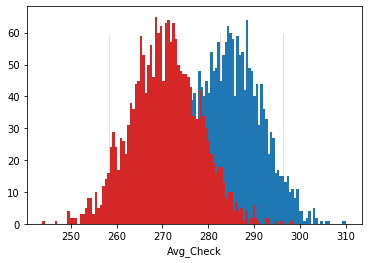

In [444]:
generate_distribution(data['before_Avg_Check'],2000)
generate_distribution(data['Avg_Check'],2000)

In [ ]:
Во втором случае, в целом доверительный интервал получился уже, что значит, что мы получили более точную оценку

In [ ]:
В целом, наглядно видно, что показатели во время действия акции улучшились

# Сделать оценку важности показателей на изменение выручки

посомтрим на корреляцию по стобцам

Видим, что у Revenue высокая корреляция с Checks и Qty

построим график зависимости по столбцам
Самая сильная зависимость (близкая к линейной) у Revenue c Checks и Qty. Значит от них она сильнее всего и зависит.

Аналагично у before Revenue с before_Checks и before Qty

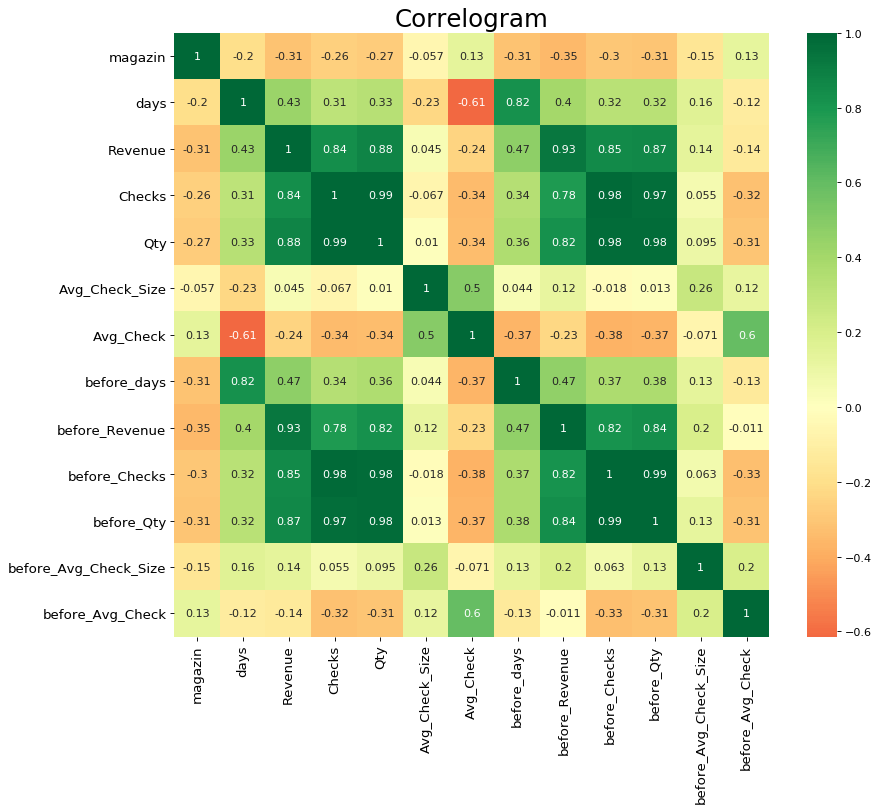

In [447]:
import matplotlib.pyplot as plt

df = data

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

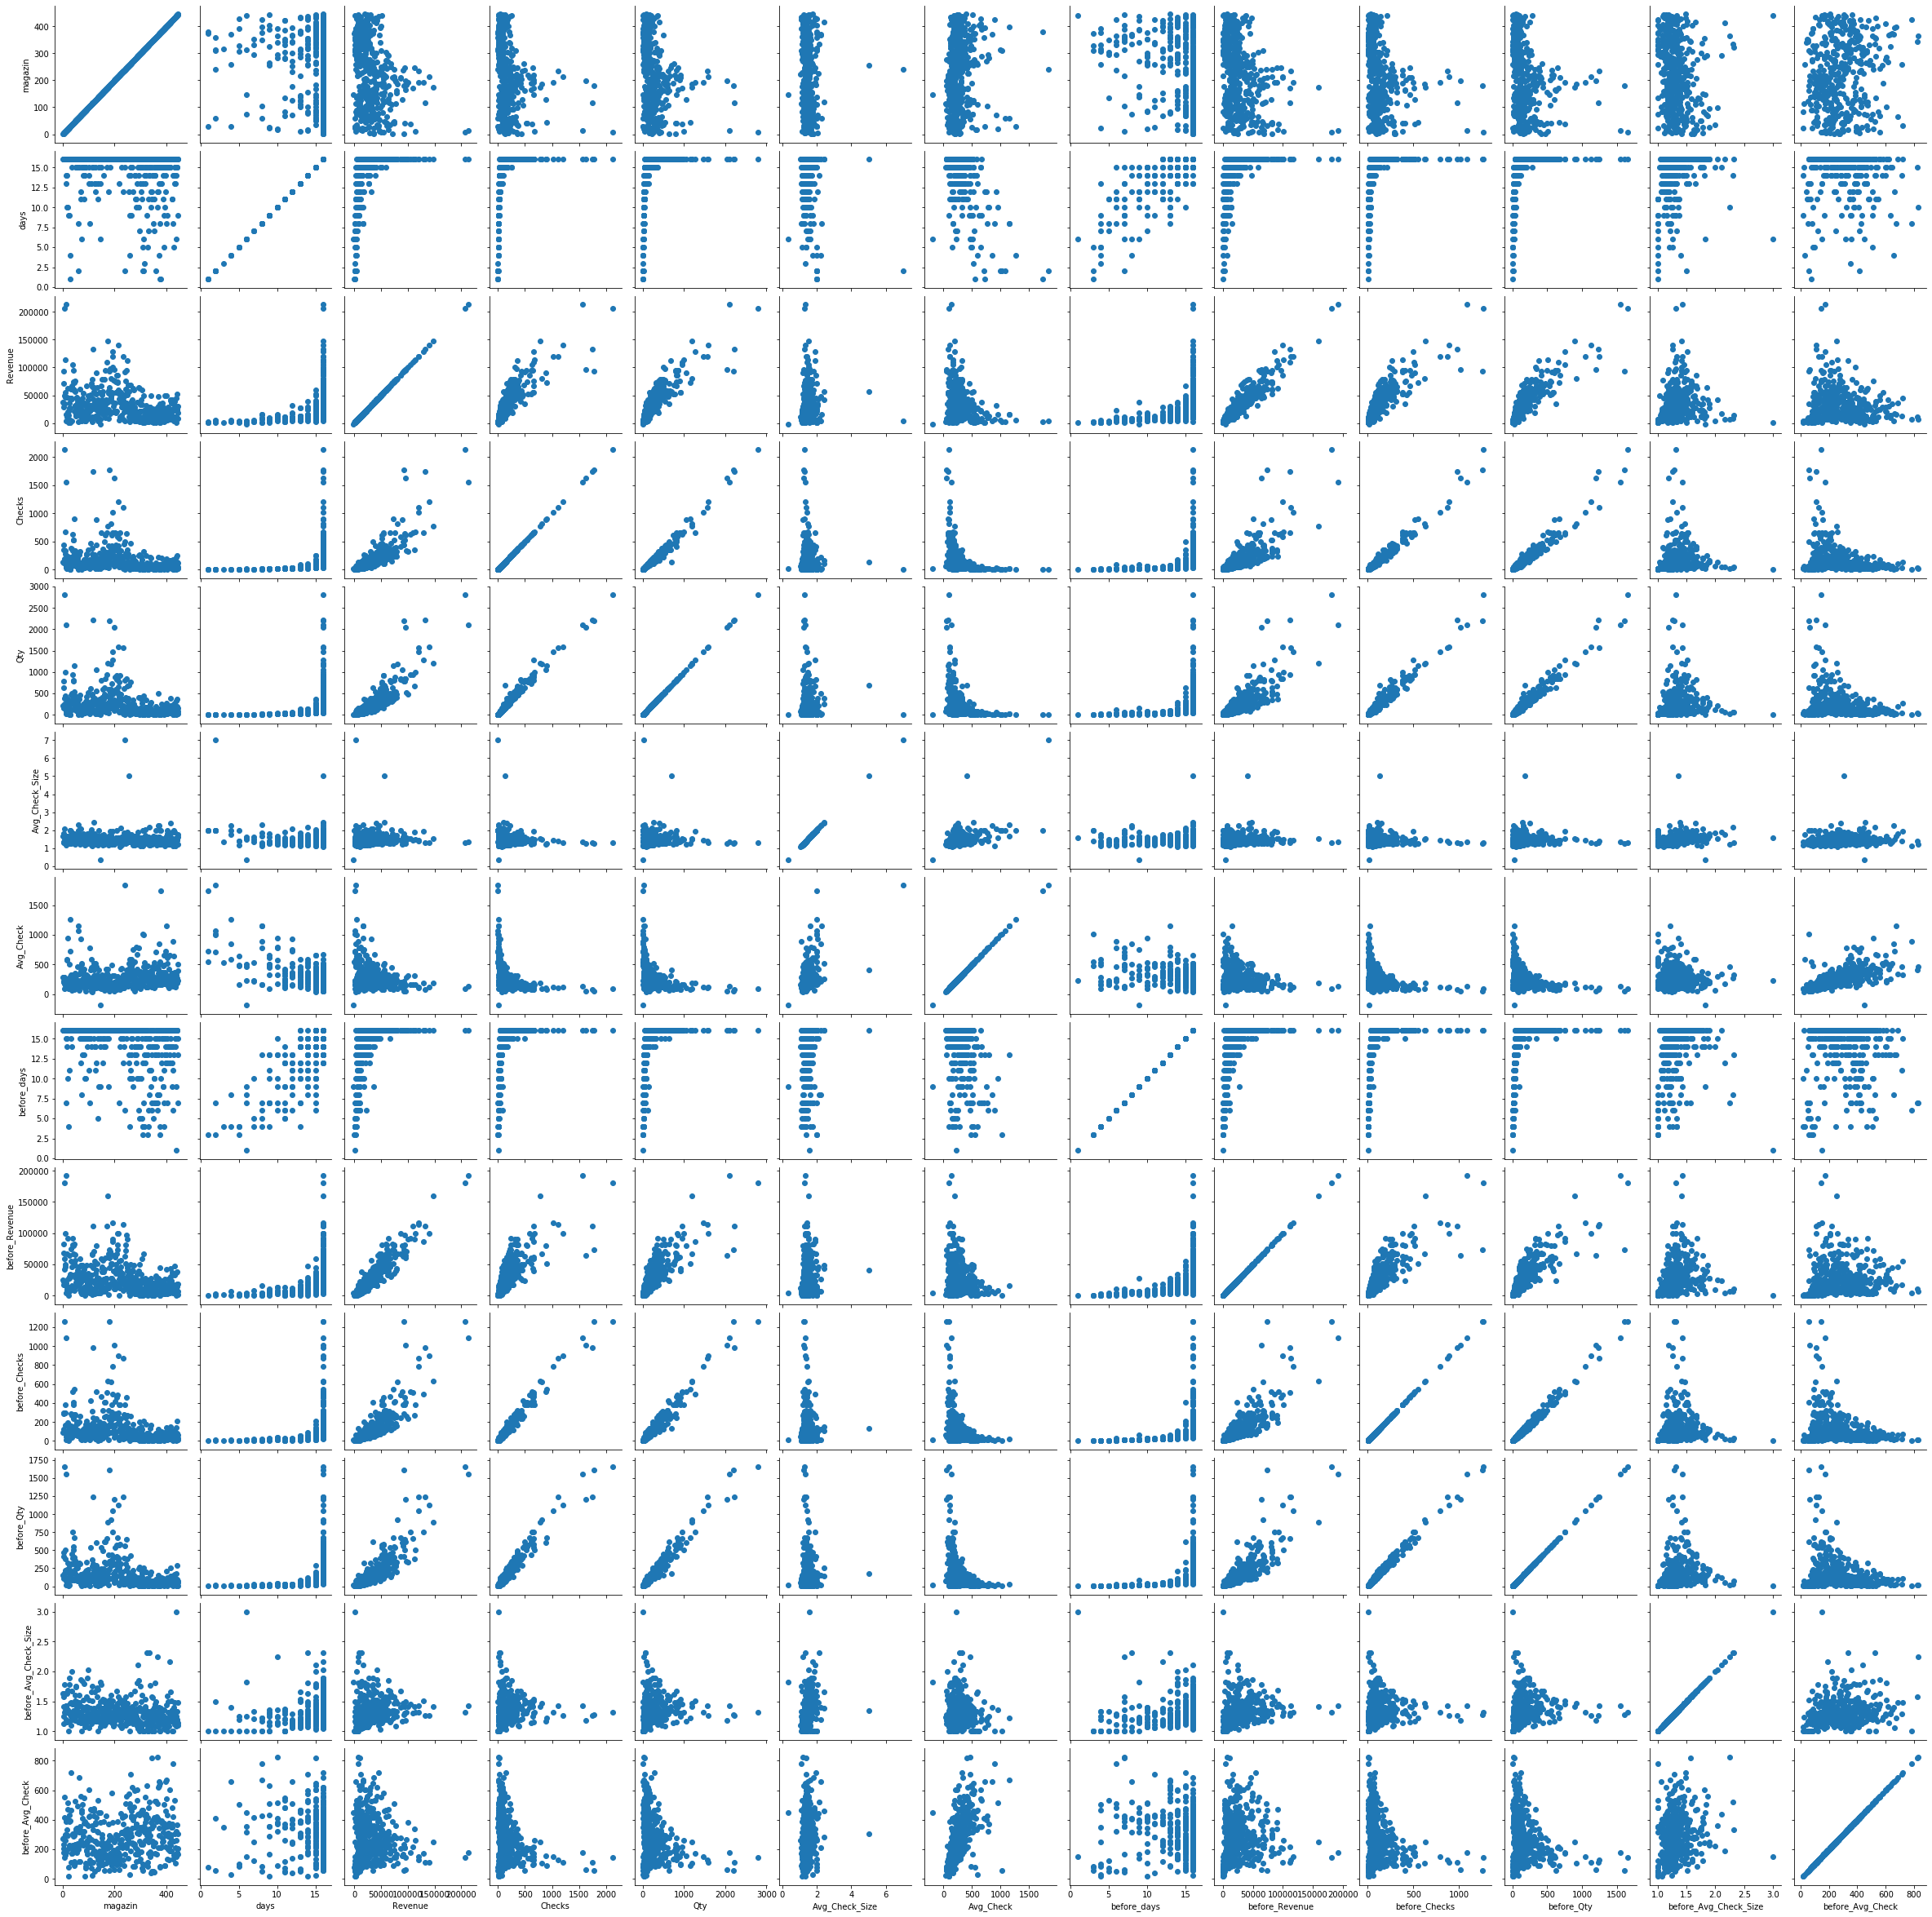

In [448]:
g = sns.PairGrid(data)
g.map(plt.scatter);

# здесь выручка третий стобец, наблюдаем линейную зав-ть у Checks и Qty, что говорит о прямой зав-ти
# размер чека и средний чек не так сильно влияют на выручку